#Amazon Data Analysis

This analysis focuses on exploring and evaluating Amazon sales data to gain insights into sales performance, customer purchasing behavior, and delivery timelines. The dataset comprises transaction records with various details, including product categories, order and shipment dates, customer information, and sales figures.

#Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the dataset - Amazon Sales Data

In [4]:
data = pd.read_csv('/content/Amazon Sales data.csv')
data.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,02-04-2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


#Description of the Dataset

* Region: Geographic region where the sale took place.
* Country: Specific country of the sale.
* Item Type: Category of the item sold (e.g., Baby Food, Cereal, Office * Supplies).
* Sales Channel: Whether the sale was made online or offline.
* Order Priority: Priority level of the order (e.g., H, C, L, M).
* Order Date: Date on which the order was placed.
* Order ID: Unique identifier for each order.
* Ship Date: Date on which the order was shipped.
* Units Sold: Number of units sold for the order.
* Unit Price: Price per unit of the item.
* Unit Cost: Cost per unit for the company.
* Total Revenue: Total revenue from the sale (Units Sold * Unit Price).
* Total Cost: Total cost for the sale (Units Sold * Unit Cost).
* Total Profit: Profit from the sale (Total Revenue - Total Cost).

#Displaying information about the dataset

In [13]:
print("Rows, Columns:",data.shape)
print("------------------------------------------")
print(data.info())
print("------------------------------------------")
print(data.describe())

Rows, Columns: (100, 14)
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB
None
----------------------------------------

#Data Preprocessing

CHANGING THE ORDER DATE AND SHIP DATE TO PANDAS DATETIME FORMAT

In [16]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='mixed', errors='coerce')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='mixed', errors='coerce')

FINDING THE YEAR, MONTH AND DAY FROM THE DATE

In [20]:
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data['Day'] = data['Order Date'].dt.day

MONTH WISE SALES TREND

In [21]:
monthly_sales = data.groupby('Month')[['Total Revenue']].sum()
print("The monthly sales is given by:")
print(monthly_sales)

The monthly sales is given by:
       Total Revenue
Month               
1        10482467.12
2        24740517.77
3         2274823.87
4        16187186.33
5        13215739.99
6         5230325.77
7        15669518.50
8         1128164.91
9         5314762.56
10       15287576.61
11       20568222.76
12        7249462.12


YEAR WISE SALES TREND

In [23]:
yearly_sales = data.groupby('Year')[['Total Revenue']].sum()
print("The yearly sales is given by:")
print(yearly_sales)

The yearly sales is given by:
      Total Revenue
Year               
2010    19186024.92
2011    11129166.07
2012    31898644.52
2013    20330448.66
2014    16630214.43
2015    12427982.86
2016    12372867.22
2017    13373419.63


TO GET THE YEAR - MONTH COLUMN

In [31]:
data['Year_month'] = data['Year'].astype(str) + '-' + data['Month'].astype(str)
print(data)

                               Region                Country        Item Type  \
0               Australia and Oceania                 Tuvalu        Baby Food   
1   Central America and the Caribbean                Grenada           Cereal   
2                              Europe                 Russia  Office Supplies   
3                  Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                  Sub-Saharan Africa                 Rwanda  Office Supplies   
..                                ...                    ...              ...   
95                 Sub-Saharan Africa                   Mali          Clothes   
96                               Asia               Malaysia           Fruits   
97                 Sub-Saharan Africa           Sierra Leone       Vegetables   
98                      North America                 Mexico    Personal Care   
99                 Sub-Saharan Africa             Mozambique        Household   

   Sales Channel Order Prio

YEARLY MONTH WISE SALES TREND

In [33]:
yearly_month_sales = data.groupby('Year_month')[['Total Revenue']].sum()
print("The monthly sales is given by:")
print(yearly_month_sales)

The monthly sales is given by:
            Total Revenue
Year_month               
2010-10        6064933.75
2010-11        3458252.00
2010-12        2581786.39
2010-2         3410661.12
2010-5         2587973.26
2010-6         1082418.40
2011-1         1042225.35
2011-11        5938385.58
2011-2          387002.20
2011-4         2798046.49
2011-5          272410.45
2011-6           19103.44
2011-7           97040.64
2011-9          574951.92
2012-1         1012884.00
2012-10        3042246.77
2012-2         6707849.42
2012-3          994765.42
2012-4         4556012.38
2012-5         3782781.82
2012-6         2132075.27
2012-7         4445093.92
2012-8          576782.80
2012-9         4648152.72
2013-10        2702770.40
2013-12         173676.25
2013-2         3296425.02
2013-3          835759.10
2013-4         3262562.10
2013-6         1352867.40
2013-7         8545511.20
2013-8           89623.98
2013-9           71253.21
2014-10        1352370.65
2014-11        4647149.58
2014-2 

TOTAL AND AVERAGE SALES REVENUE

In [35]:
tot_rev = data['Total Revenue'].sum()
avg_rev = data['Total Revenue'].mean()
print("The Total Revenue is:",tot_rev)
print("The Average Revenue of the data is:", avg_rev)

The Total Revenue is: 137348768.31
The Average Revenue of the data is: 1373487.6831


REGION WITH MOST SALES

In [38]:
mod = np.unique(data['Region'])
mod1 = np. argmax(mod)
print('The Region with the most sales is:',mod [mod1])

The Region with the most sales is: Sub-Saharan Africa


COUNT OF DIFFERENT ITEMS ORDERED

In [39]:
temp = data['Item Type'].value_counts()
print(temp)

Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64


THREE MOST ORDERED ITEMS BY CUSTOMERS

In [40]:
top_orders = data.groupby('Item Type')['Total Revenue'].sum().nlargest(3)
print('The three most ordered items according to revenue:')
print(top_orders)

The three most ordered items according to revenue:
Item Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Name: Total Revenue, dtype: float64


FINDING THE GROSS PROFIT MARGIN COLUMN

In [41]:
data['Gross Profit Margin'] = (data['Total Profit']/data['Total Revenue'])*100
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Day,Year_month,Gross Profit Margin
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,28,2010-5,37.550924
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,22,2012-8,43.067574
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2,2014-5,19.386987
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,20,2014-6,25.830654
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,1,2013-2,19.386987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,2011,7,26,2011-7,67.203514
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,2011,11,11,2011-11,25.830654
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05,2016,6,1,2016-6,40.977541
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,2015,7,30,2015-7,30.661936


THE LEAST AND MAXIMUM PROFIT FROM THE SALES

In [43]:
min_profit = data['Gross Profit Margin'].min()
print("The Least Profit got is:“,round(min_profit,2")
max_profit = data['Gross Profit Margin'].max()
print("The Most Profit got is:“,round(max_profit,2")

The Least Profit got is:“,round(min_profit,2
The Most Profit got is:“,round(max_profit,2


TIME TAKEN (IN DAYS) FOR DELIVERY

In [45]:
data['Delivery Time']=(data['Ship Date']-data['Order Date']).dt.days
print('The Average Delivery Time taken is:',round(data['Delivery Time'].mean(),2),'days.')

The Average Delivery Time taken is: 23.36 days.


LEAST AND MOST TIME TAKEN FOR DELIVERY

In [46]:
print("The least time taken for delivery is:",data['Delivery Time'].min())
print("The most time taken for delivery is:",data['Delivery Time'].max())

The least time taken for delivery is: 0
The most time taken for delivery is: 50



CORRELATION MATRIX OF THE DATA


In [55]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation = numeric_data.corr()
correlation

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Gross Profit Margin,Delivery Time
Order ID,1.000000,-0.222907,-0.190941,-0.213201,-0.314688,-0.328944,-0.234638,0.186907,0.100415
Units Sold,-0.222907,1.000000,-0.070486,-0.092232,0.447784,0.374746,0.564550,0.080699,-0.050720
Unit Price,-0.190941,-0.070486,1.000000,0.987270,0.752360,0.787905,0.557365,-0.435504,-0.063159
Unit Cost,-0.213201,-0.092232,0.987270,1.000000,0.715623,0.774895,0.467214,-0.535481,-0.076085
Total Revenue,-0.314688,0.447784,0.752360,0.715623,1.000000,0.983928,0.897327,-0.269731,-0.022288
Total Cost,-0.328944,0.374746,0.787905,0.774895,0.983928,1.000000,0.804091,-0.384076,-0.033098
Total Profit,-0.234638,0.564550,0.557365,0.467214,0.897327,0.804091,1.000000,0.051306,0.007608
Gross Profit Margin,0.186907,0.080699,-0.435504,-0.535481,-0.269731,-0.384076,0.051306,1.000000,0.152316
Delivery Time,0.100415,-0.050720,-0.063159,-0.076085,-0.022288,-0.033098,0.007608,0.152316,1.000000


SCATTER PLOT BETWEEN UNIT PRICE AND UNIT COST

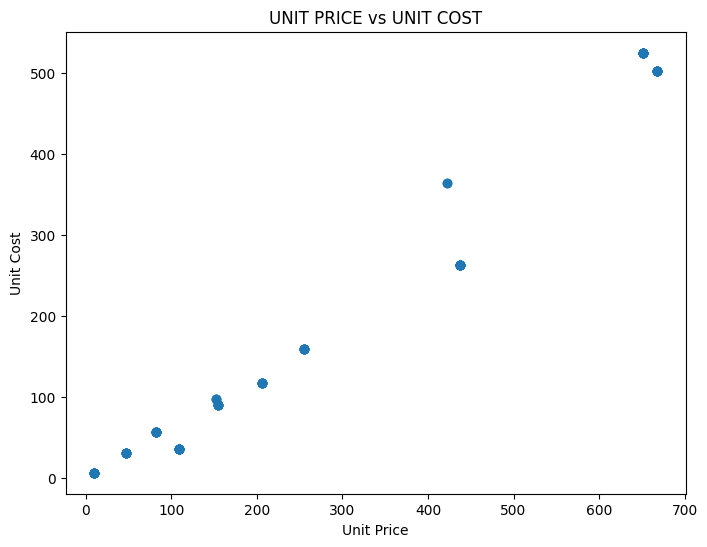

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(data['Unit Price'], data['Unit Cost'])
plt.title('UNIT PRICE vs UNIT COST')
plt.xlabel('Unit Price')
plt.ylabel('Unit Cost')
plt.show()


TOTAL PROFIT OVER THE MONTHS


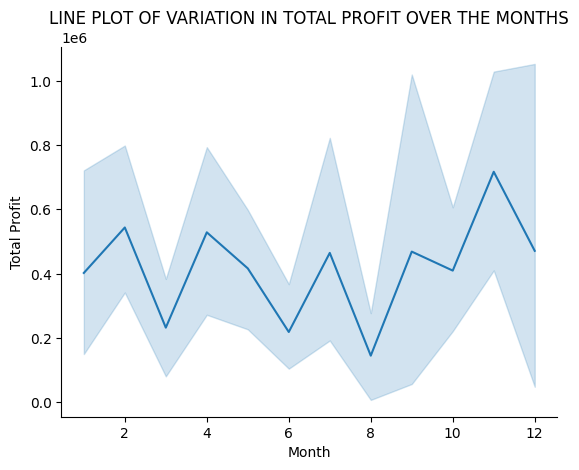

In [51]:
plt.title("LINE PLOT OF VARIATION IN TOTAL PROFIT OVER THE MONTHS")
sns.lineplot(x=data['Month'],y=data['Total Profit'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


DISTRIBUTION OF UNITS SOLD


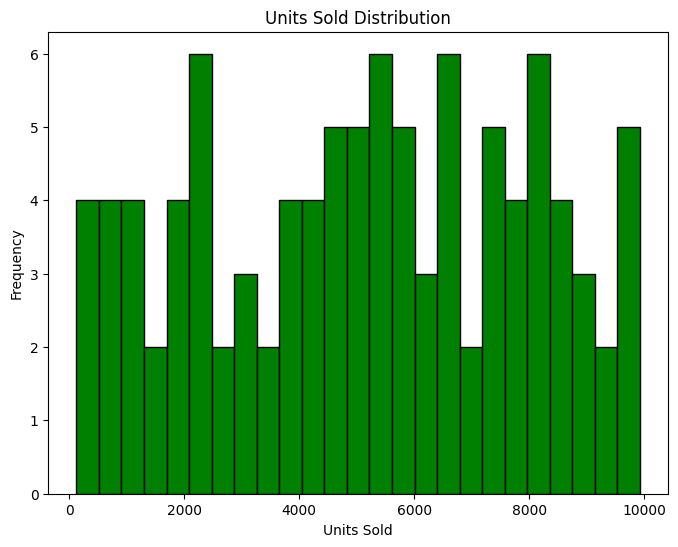

In [52]:
plt.figure(figsize=(8,6))
plt.hist(data['Units Sold'],bins=25,edgecolor='black',color='green')
plt.title('Units Sold Distribution')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()


SALES CHANNEL ANALYSIS


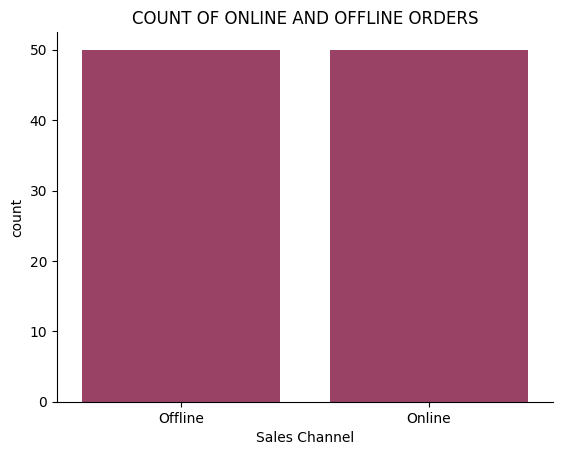

In [53]:
plt.title("COUNT OF ONLINE AND OFFLINE ORDERS")
sns.countplot(x='Sales Channel', data=data, color='#A73362')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()



TOTALREVENUETHROUGHTHEYEARS


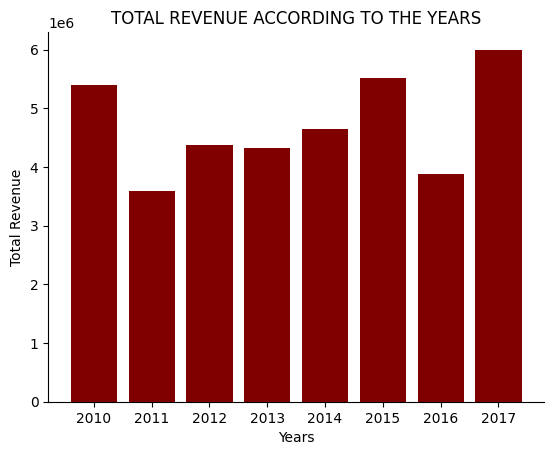

In [56]:
plt.title('TOTAL REVENUE ACCORDING TO THE YEARS')
plt.bar(data['Year'], data['Total Revenue'],color=['maroon'])
plt.xlabel('Years')
plt.ylabel('Total Revenue')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


DISTRIBUTION OF ORDER PRIORITY


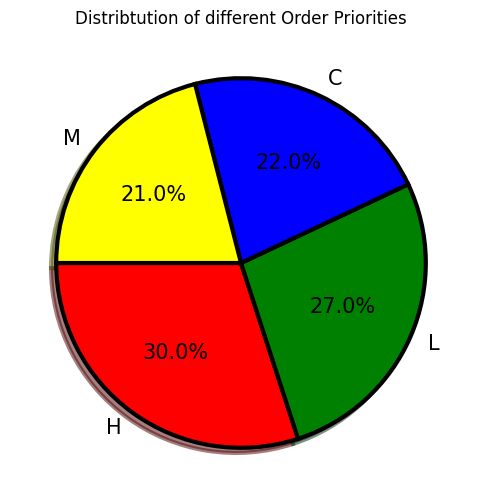

In [58]:
plt.figure(figsize=(8,6))
plt.pie(data['Order Priority'].value_counts(),labels=['H', 'L','C', 'M'],explode=[0,0,0,0],autopct='%1.1f%%', colors=['red', 'green','blue', 'yellow'], shadow=True, startangle=180, textprops={'fontsize' :15}, wedgeprops={'linewidth' :3,'width' :1, 'edgecolor' : 'k'})
plt.title('Distribtution of different Order Priorities')
plt.show()

REGION WISE SALES ACCORDING TO REVENUE

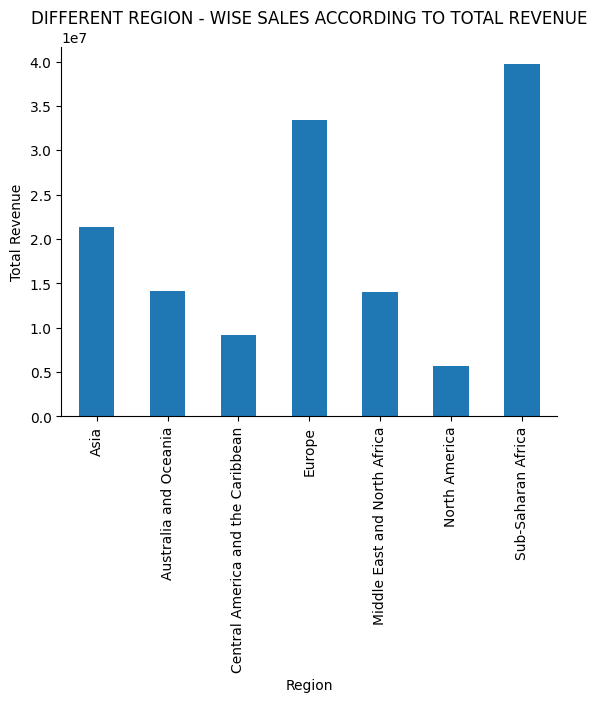

In [59]:
plt.title('DIFFERENT REGION - WISE SALES ACCORDING TO TOTAL REVENUE')
reg_sales = data.groupby('Region')['Total Revenue'].sum()
reg_sales.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()